# Exercise 2
Show that in the SOM algorithm the winner neuron for an input x is that neuron k whose weight
vector wk maximizes the inner product < wk; x > of x and wk, take x and wk as normalized.

Let A and B be two vector and $\theta$ be the angle between them as shown in the figure.

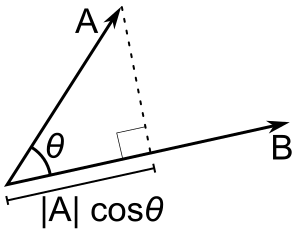

In [7]:
Image(filename ='1.png')


Then the inner product or dot product of these 2 vectors is equivalent to : $$ \textbf{A}.\textbf{B} = ||\textbf{A}||\ ||\textbf{B}||\ cos(\theta)$$. Maximising this inner product implies $cos(\theta) = 1$ or $\theta = 0$. In other words, the euclidean distance between the 2 vectors is minimised. Since we need to minimize the distance between a winning neuron and the input vector, hence the inner product $\textit{< wk; x > }$ needs to be maximised

In [3]:
import numpy as np
from IPython.display import Image

In [14]:
class SOM:
    def __init__(self,input_,num_of_nodes,eta,initial_wts,threshold):
        self.input_ = input_
        self.num_of_nodes = num_of_nodes
        self.eta = eta
        self.current_wts = initial_wts
        self.t2 = 1000
        self.threshold = threshold
    
    def euclidean_distance_1d(self,x,y):
        return abs(x - y)
    
    def get_winning_neuron(self,x,W):
        winner = min([(self.euclidean_distance_1d(x,w), index) for index,w in enumerate(W)])[1]
        return winner
    
    def d_ij(self,winner):
        distance = [self.euclidean_distance_1d(self.current_wts[winner],\
                                               self.current_wts[i])\
                    for i in range(len(self.current_wts))]
        return distance
    
    def gaussian(self,sigma,distance):
        h = [np.exp(-(d**2)/(2*sigma**2)) for d in distance]
        return h
    
    def compute_width(self,initial_sigma,n,t1):
        return initial_sigma*np.exp(-n/t1)
    
    def weight_adaptation(self,current_wt,eta,h,x):
        new_wts = [(w + (eta*h*(x-w))) for w in current_wt]
        return new_wts
    
    def exponential_decay_update(self,initial_eta,n,t2):
        return initial_eta*np.exp(-n/t2)
    
    def compute_t1(self,t2):
        sigma=2
        return t2/np.log(sigma)
    
    def stopping_criteria(self,w_old,w_new):
        result = 0
        for i,w in enumerate(w_old):
            result += abs(w - w_new[i])
        
        return True if (result < self.threshold) else False
    
    def train(self):
        sigma = 2
        t1 = self.compute_t1(self.t2)
        n = 1
        for x in self.input_:
            while(True):
                win_idx = self.get_winning_neuron(x,self.current_wts)                
                print "\nWinner neuron index : "+str(win_idx)+", weight :"+str(self.current_wts[win_idx])
                lateral_dist = self.d_ij(win_idx)
                h = self.gaussian(sigma,lateral_dist)
                updates_wts = self.weight_adaptation(self.current_wts,self.eta,h[win_idx],x)
                print "Updated weights :",updates_wts
                if not self.stopping_criteria(self.current_wts,updates_wts):
                    self.current_wts =  np.array(updates_wts)
                    self.eta = self.exponential_decay_update(self.eta,n,self.t2)
                    n += 1 
                else:
                    break
        print "\nFinal adjusted weights :",self.current_wts

In [15]:
initial_wts = np.array([[0.15,0.45],
                        [0.3,0.9]])
inputs = [0.1,0.2,0.4,0.5]

In [18]:
"""
Initial weights : [0.15 , 0.45]
"""
som = SOM(inputs,2,0.1,initial_wts[0],0.01)
som.train()


Winner neuron index : 0, weight :0.15
Updated weights : [0.14499999999999999, 0.41500000000000004]

Winner neuron index : 0, weight :0.145
Updated weights : [0.1433445425147285, 0.40341179760309959]

Winner neuron index : 0, weight :0.143344542515
Updated weights : [0.14275793792092928, 0.39930556544650508]

Winner neuron index : 0, weight :0.143344542515
Updated weights : [0.1441112907532954, 0.40065891827887118]

Winner neuron index : 1, weight :0.403411797603
Updated weights : [0.14681799641802767, 0.40336562394360342]

Winner neuron index : 1, weight :0.403411797603
Updated weights : [0.1481713492503938, 0.40471897677596957]

Final adjusted weights : [ 0.14334454  0.4034118 ]


In [19]:
"""
Initial weights : [0.3,0.9]
"""
som = SOM(inputs,2,0.1,initial_wts[1],0.01)
som.train()


Winner neuron index : 0, weight :0.3
Updated weights : [0.27999999999999997, 0.82000000000000006]

Winner neuron index : 0, weight :0.28
Updated weights : [0.27337817005891402, 0.79351268023565624]

Winner neuron index : 0, weight :0.273378170059
Updated weights : [0.27103175168371713, 0.78412700673486879]

Winner neuron index : 0, weight :0.271031751684
Updated weights : [0.27018023473230185, 0.78072093892920769]

Winner neuron index : 0, weight :0.271031751684
Updated weights : [0.27067810541598047, 0.78121880961288637]

Winner neuron index : 0, weight :0.271031751684
Updated weights : [0.27167384678333778, 0.78221455098024362]

Winner neuron index : 0, weight :0.271031751684
Updated weights : [0.27217171746701641, 0.7827124216639223]

Final adjusted weights : [ 0.27103175  0.78412701]
